In [4]:
!pip install yfinance
!pip install pandas
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 101.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 117.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 108.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 121.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 40.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=5cebe2e7be802f5ff43927e63b601fdda8c08cf9a03005b7f1c5c9bba26c3401
  Stored in directory: /home/jupyterlab/.cache/pip

In [8]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [17]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#Question 1: Use yfinance to Extract Stock Data.Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function.

In [30]:
TESLA=yf.Ticker("TSLA")

In [31]:
tesla_data=TESLA.history(period="max")

In [38]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [ ]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data. Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [39]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [40]:
html_data  = requests.get(url).text
soup = BeautifulSoup(html_data,"html5lib")

In [41]:
soup.find_all('table')
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    tesla_revenue = pd.concat([tesla_revenue,pd.DataFrame({"Date":[date], "Revenue":[revenue]})], ignore_index=True)  

In [42]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [43]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [ ]:
#Question 3: Use yfinance to Extract Stock Data. Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [48]:
GameStop=yf.Ticker("GME")

In [49]:
gme_data = GameStop.history(period="max")

In [50]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
#Question 4: Use Webscraping to Extract GME Revenue Data. Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [10]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [11]:
html_data_2 = requests.get(url).text

In [16]:
soup = BeautifulSoup(html_data_2,"html5lib")

In [25]:
soup.find_all("table")
gme_revenue = pd.DataFrame(columns = ['Date','Revenue'])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date],"Revenue":[revenue]})], ignore_index = True)

In [21]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

In [26]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [ ]:
#Question 5: Plot Tesla Stock Graph
#Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

In [27]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

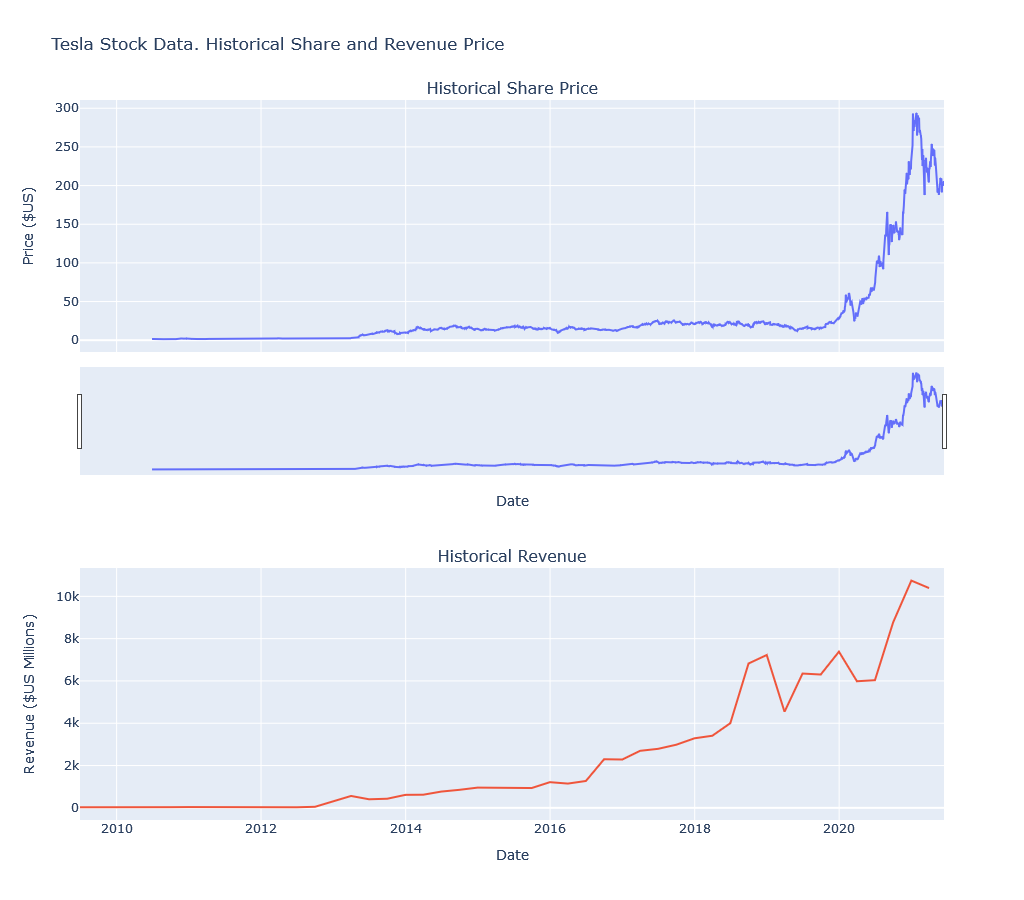

In [46]:
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data. Historical Share and Revenue Price')

In [ ]:
#Question 6: Plot GameStop Stock Graph Use the make_graph function to graph the GameStop Stock Data, also provide a title for the grap 

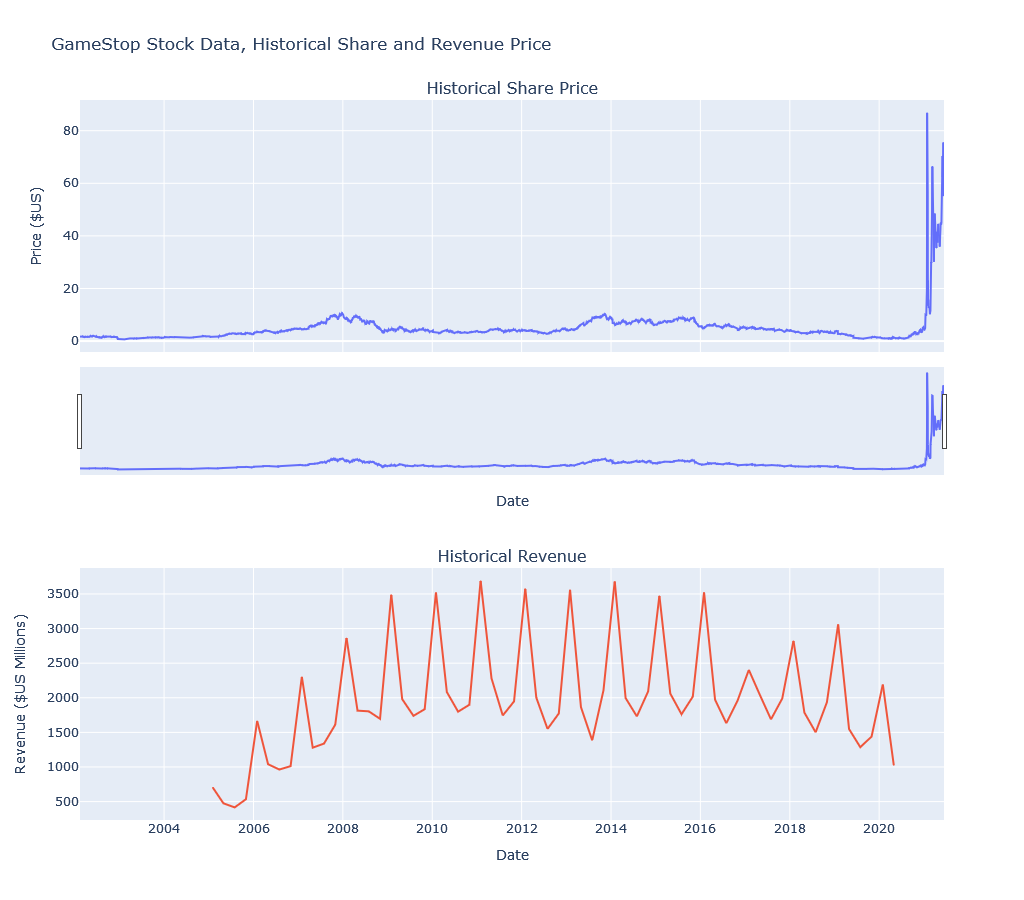

In [52]:
make_graph(gme_data, gme_revenue, 'GameStop Stock Data, Historical Share and Revenue Price')